# Task1-Spark foundation

## Prediction using supervised ML
### Predict the percentage of marks that a student is expected to score based on number of hours they studied.

## Name:Pallavi K S

In [7]:
#importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
# reading data from given link
data=pd.read_csv('http://bit.ly/w-data')

In [17]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
data.shape

(25, 2)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [21]:
#Ckeck if any missing values are there
print("missing values: ",data.isnull().values.sum())

missing values:  0


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


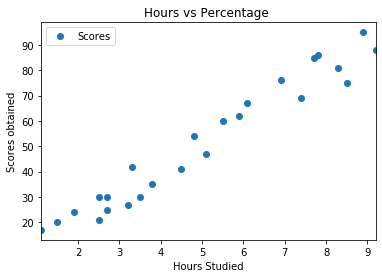

In [11]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage ')
plt.xlabel('Hours Studied')
plt.ylabel('Scores obtained')
plt.show()

There is positive linear relation between number of hours studied and scores obtained.

### Preparing the data for prediction analysis

In [12]:
#divide data into independent and dependent variables 
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Training the algorithm

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print("Training Completed.")


Training Completed.


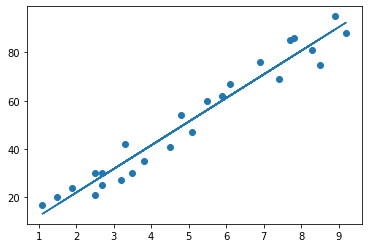

In [32]:
#now we plot the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Making Predictions
### Now that we have trained our algorithm, it's time to make some predictions.

In [33]:
print(x_test) # Testing data - In Hours
y_pred = reg.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [34]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Task to predict the score for the student with study hours for 9.25 hrs/ day.

In [35]:
hours = 9.25
pred = reg.coef_*hours+reg.intercept_
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


### Evaluating the model

In [36]:
#Evaluating the model based performance our algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.4197278080276545
Mean Squared Error: 22.96509721270044


## Thank you